## Web scraping Project On Flipkart Washing Mechine

In [2]:
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [3]:
import warnings
warnings.filterwarnings("ignore")


## Data Scraping For Given Site 

In [5]:
url="https://www.flipkart.com/search?q=washing+machine&sid=j9e%2Cabm%2C8qx&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_7_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_7_na_na_na&as-pos=1&as-type=RECENT&suggestionId=washing+machine%7CWashing+Machines&requestId=d2ceaae6-5a8c-4ef1-972c-9223d67cdba4&as-searchtext=washinf"

In [6]:
response=requests.get(url)

In [7]:
response

<Response [200]>

In [8]:
pagecontent=response.text

In [9]:

soup=BeautifulSoup(pagecontent)

In [10]:
pname=soup.find("div",attrs={"class":"RG5Slk"})

In [11]:
pname

<div class="RG5Slk">realme TechLife 7.5 kg 5 Star Rating Semi Automatic Top Load Washing Machine Black, Grey</div>

In [12]:
productname=[]
for x in soup.find_all("div",attrs={"class":"RG5Slk"}):
    productname.append(x.text if x else np.nan)
# Display all product name
for name in productname:
    print(name)

realme TechLife 7.5 kg 5 Star Rating Semi Automatic Top Load Washing Machine Black, Grey
Samsung 10 kg 5 Star, AI Wash, AI Energy Mode, Wi-Fi, Ecobubble, AI VRT+, Soft Closing Door, Digital I...
realme TechLife 7 kg 5 Star rating Semi Automatic Top Load Washing Machine White, Black
Haier 6.5 kg Balance Clean Pulsator, Custom Wash Cycles with 15 Mins Quick Wash, Magic Filter Fully Au...
VW 7.5 kg Semi Automatic Top Load Washing Machine Black, Grey
Thomson 7.5 kg 5 Star Aqua Magic Semi Automatic Top Load Washing Machine Black
realme TechLife 10 kg Semi Automatic Top Load Washing Machine Grey
MarQ by Flipkart 6 kg 5 Star Rating Innowash Range Semi Automatic Top Load Washing Machine White, Maro...
MarQ by Flipkart 7 kg 5 Star Rating Innowash Range Semi Automatic Top Load Washing Machine Blue, White
Voltas Beko 10 kg Semi Automatic Top Load Washing Machine Blue
Godrej 7 kg Zero Pressure Technology Fills Tub 60% Faster, Fabrisafe Steel Drum Fully Automatic Top Lo...
Samsung 8 kg 5 Star, AI W

In [13]:
ratings=soup.find("div",attrs={"class":"a7saXW"})
ratings

<div class="a7saXW"><span class="CjyrHS" id="productRating_LSTWMNGATRJPSSNF4BNVZQWDR_WMNGATRJPSSNF4BN_"><div class="MKiFS6">4.2</div></span><span class="PvbNMB"><span><span>1,01,374 Ratings </span><span class="o2SIOJ">&amp;</span><span> 8,656 Reviews</span></span></span></div>

In [14]:
ratings=[]
for x in soup.find_all("div",attrs={"class":"a7saXW"}):
    ratings.append(x.text if x else np.nan)
# Display all product name
for name in ratings:
    print(name)

4.21,01,374 Ratings & 8,656 Reviews
4.31,11,681 Ratings & 7,055 Reviews
4.21,01,374 Ratings & 8,656 Reviews
4.375,604 Ratings & 8,286 Reviews
4.31,033 Ratings & 73 Reviews
4.131,634 Ratings & 2,643 Reviews
4.21,01,374 Ratings & 8,656 Reviews
4.331,939 Ratings & 2,757 Reviews
4.364,702 Ratings & 6,289 Reviews
4.3108 Ratings & 5 Reviews
4.211,011 Ratings & 749 Reviews
4.31,11,681 Ratings & 7,055 Reviews
4.364,702 Ratings & 6,289 Reviews
4.319,193 Ratings & 1,593 Reviews
43,220 Ratings & 307 Reviews
4.37,208 Ratings & 424 Reviews
4.314,475 Ratings & 1,044 Reviews
4.21,01,374 Ratings & 8,656 Reviews
4.488,307 Ratings & 6,112 Reviews
4.324,211 Ratings & 1,582 Reviews
4.31,11,681 Ratings & 7,055 Reviews
43,377 Ratings & 272 Reviews
4.440,667 Ratings & 2,511 Reviews
4.440,667 Ratings & 2,511 Reviews


In [15]:
discounts=soup.find("div",attrs={"class":"col col-5-12 mao5dl"})
discounts

<div class="col col-5-12 mao5dl"><div class="oFEPlD"><div class="QiMO5r"><div class="hZ3P6w DeU9vF">₹8,090</div><div class="kRYCnD gxR4EY">₹<!-- -->13,990</div><div class="HQe8jr"><span>42% off</span></div></div></div><div class="qYp2rh"><img height="21" src="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/img/fa_9e47c1.png"/></div><div class="MaiFhH"><div class="hx1EGN"><div class="HZ0E6r Rm9_cy" style="color:#000000;font-size:14px;font-style:normal;font-weight:400">Upto </div><div class="HZ0E6r Rm9_cy" style="color:#000000;font-size:14px;font-style:normal;font-weight:700">₹1,330</div><div class="HZ0E6r Rm9_cy" style="color:#000000;font-size:14px;font-style:normal;font-weight:400"> Off on Exchange</div></div></div><div class="MaiFhH"><div class="hx1EGN"><div class="HZ0E6r Rm9_cy" style="color:#26A541;font-size:14px;font-weight:700">Bank Offer</div></div></div></div>

In [16]:
for i in range(1,101):
    url=f"https://www.flipkart.com/search?q=washing+machine&sid=j9e%2Cabm%2C8qx&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_7_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_7_na_na_na&as-pos=1&as-type=RECENT&suggestionId=washing+machine%7CWashing+Machines&requestId=d2ceaae6-5a8c-4ef1-972c-9223d67cdba4&as-searchtext=washinf"
    print(url)

https://www.flipkart.com/search?q=washing+machine&sid=j9e%2Cabm%2C8qx&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_7_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_7_na_na_na&as-pos=1&as-type=RECENT&suggestionId=washing+machine%7CWashing+Machines&requestId=d2ceaae6-5a8c-4ef1-972c-9223d67cdba4&as-searchtext=washinf
https://www.flipkart.com/search?q=washing+machine&sid=j9e%2Cabm%2C8qx&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_7_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_7_na_na_na&as-pos=1&as-type=RECENT&suggestionId=washing+machine%7CWashing+Machines&requestId=d2ceaae6-5a8c-4ef1-972c-9223d67cdba4&as-searchtext=washinf
https://www.flipkart.com/search?q=washing+machine&sid=j9e%2Cabm%2C8qx&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_7_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_7_na_na_na&as-pos=1&as-type=RECENT&suggestionId=washing+machine%7CWashing+Machines&requestId=d2ceaae6-5a8c-4ef1-972c-9223d67cdba4&as-se

In [17]:
from bs4 import BeautifulSoup
import requests
import numpy as np
import time

productname = [] 
price = []
rating = []
features = []
pagenum = []
original_price = []
Discount = []
Review = []

total_time = time.time()

for i in range(1,101): 
    start_time = time.time()
    URL = f"https://www.flipkart.com/search?q=washing+machine&sid=j9e%2Cabm%2C8qx&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_7_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_7_na_na_na&as-pos=1&as-type=RECENT&suggestionId=washing+machine%7CWashing+Machines&requestId=d2ceaae6-5a8c-4ef1-972c-9223d67cdba4&as-searchtext=washinf"
    page = requests.get(URL)
    soup = BeautifulSoup(page.text, "html.parser")

    for x in soup.find_all('div', attrs={'class':'ZFwe0M row'}):
        pname = x.find('div', attrs={'class':'RG5Slk'})
        cost = x.find('div', attrs={'class':'hZ3P6w DeU9vF'})   # discounted price
        rat = x.find('div', attrs={'class':'MKiFS6'})
        specs = x.find('div', attrs={'class':'CMXw7N'})
        op = x.find('div', attrs={'class':'kRYCnD gxR4EY'})
        discount = x.find('div', attrs={'class':'HQe8jr'})
        reviews = x.find('span', attrs={'class':'PvbNMB'})
        

        productname.append(pname.text if pname else np.nan)
        price.append(cost.text if cost else np.nan)
        rating.append(rat.text if rat else np.nan)
        features.append(specs.text if specs else np.nan)
        original_price.append(op.text if op else np.nan)
        Discount.append(discount.text if discount else np.nan)
        Review.append(reviews.text if reviews else np.nan)
        
        pagenum.append(i)

    print(f'Page {i} completed in {time.time()-start_time:.2f} seconds')

print("Total Time Completed in seconds", str(time.time()-total_time))

Page 1 completed in 0.73 seconds
Page 2 completed in 0.63 seconds
Page 3 completed in 0.47 seconds
Page 4 completed in 0.52 seconds
Page 5 completed in 0.08 seconds
Page 6 completed in 0.66 seconds
Page 7 completed in 0.51 seconds
Page 8 completed in 0.65 seconds
Page 9 completed in 0.64 seconds
Page 10 completed in 0.67 seconds
Page 11 completed in 0.67 seconds
Page 12 completed in 0.63 seconds
Page 13 completed in 0.45 seconds
Page 14 completed in 0.63 seconds
Page 15 completed in 0.63 seconds
Page 16 completed in 0.57 seconds
Page 17 completed in 0.45 seconds
Page 18 completed in 0.68 seconds
Page 19 completed in 0.54 seconds
Page 20 completed in 0.64 seconds
Page 21 completed in 0.70 seconds
Page 22 completed in 0.80 seconds
Page 23 completed in 0.51 seconds
Page 24 completed in 0.59 seconds
Page 25 completed in 0.53 seconds
Page 26 completed in 0.50 seconds
Page 27 completed in 0.68 seconds
Page 28 completed in 0.63 seconds
Page 29 completed in 0.63 seconds
Page 30 completed in 0.

## Raw Data

In [19]:
washingmachine_df=pd.DataFrame({"Productname":productname,"Price":price,"ratings":rating,"features":features,"pagenum":pagenum,"original_price":original_price,"Discount":Discount,"Review":Review})
washingmachine_df

,Productname,Price,ratings,features,pagenum,original_price,Discount,Review
0,"Samsung 10 kg 5 Star, AI Wash, AI Energy Mode,...","₹24,990",4.3,700 rpm Max Speed5 Star Rating2 Years comprehe...,1,"₹33,990",26% off,"1,11,681 Ratings & 7,055 Reviews"
1,"Samsung 8 kg 5 Star, AI Wash, AI Energy Mode, ...","₹22,490",4.3,700 rpm Max Speed5 Star Rating2 Years comprehe...,1,"₹30,990",27% off,"1,11,681 Ratings & 7,055 Reviews"
2,realme TechLife 7 kg 5 Star rating Semi Automa...,"₹7,590",4.2,1400 RPM Max Speed5 Star Rating2 Years Warrant...,1,"₹12,490",39% off,"1,01,374 Ratings & 8,656 Reviews"
3,"Haier 6.5 kg Balance Clean Pulsator, Custom Wa...","₹11,790",4.3,800 rpm Max Speed5 Star Rating2 Years Comprehe...,1,"₹18,990",37% off,"75,604 Ratings & 8,286 Reviews"
4,VW 7.5 kg Semi Automatic Top Load Washing Mach...,"₹6,899",4.3,1350 RPM Max Speed5 Star Rating2 Years Compreh...,1,"₹18,999",63% off,"1,033 Ratings & 73 Reviews"
...,...,...,...,...,...,...,...,...
2371,Voltas Beko 6 kg Semi Automatic Top Load Washi...,"₹7,490",4.3,1350 rpm Max Speed5 Star Rating1 Year Warranty...,100,"₹12,000",37% off,"24,211 Ratings & 1,582 Reviews"
2372,realme TechLife 8 kg Soft closing Glass lid Fu...,"₹14,290",4,700 RPM Max Speed5 Star RatingWith In-Built He...,100,"₹28,990",50% off,"3,377 Ratings & 272 Reviews"
2373,"Samsung 8 kg 5 Star, AI Wash, AI Energy Mode, ...","₹22,490",4.3,700 rpm Max Speed5 Star Rating2 Years comprehe...,100,"₹30,990",27% off,"1,11,681 Ratings & 7,055 Reviews"
2374,Samsung 7.5 Kg Semi Automatic Top Load Washing...,"₹10,990",4.4,1300 rpm Max Speed5 Star Rating2 years compreh...,100,"₹15,800",30% off,"40,667 Ratings & 2,511 Reviews"


In [20]:
washingmachine_df.to_csv("washingmachine1.csv",index=False)

In [21]:
df=pd.read_csv("washingmachine1.csv")
df

,Productname,Price,ratings,features,pagenum,original_price,Discount,Review
0,"Samsung 10 kg 5 Star, AI Wash, AI Energy Mode,...","₹24,990",4.3,700 rpm Max Speed5 Star Rating2 Years comprehe...,1,"₹33,990",26% off,"1,11,681 Ratings & 7,055 Reviews"
1,"Samsung 8 kg 5 Star, AI Wash, AI Energy Mode, ...","₹22,490",4.3,700 rpm Max Speed5 Star Rating2 Years comprehe...,1,"₹30,990",27% off,"1,11,681 Ratings & 7,055 Reviews"
2,realme TechLife 7 kg 5 Star rating Semi Automa...,"₹7,590",4.2,1400 RPM Max Speed5 Star Rating2 Years Warrant...,1,"₹12,490",39% off,"1,01,374 Ratings & 8,656 Reviews"
3,"Haier 6.5 kg Balance Clean Pulsator, Custom Wa...","₹11,790",4.3,800 rpm Max Speed5 Star Rating2 Years Comprehe...,1,"₹18,990",37% off,"75,604 Ratings & 8,286 Reviews"
4,VW 7.5 kg Semi Automatic Top Load Washing Mach...,"₹6,899",4.3,1350 RPM Max Speed5 Star Rating2 Years Compreh...,1,"₹18,999",63% off,"1,033 Ratings & 73 Reviews"
...,...,...,...,...,...,...,...,...
2371,Voltas Beko 6 kg Semi Automatic Top Load Washi...,"₹7,490",4.3,1350 rpm Max Speed5 Star Rating1 Year Warranty...,100,"₹12,000",37% off,"24,211 Ratings & 1,582 Reviews"
2372,realme TechLife 8 kg Soft closing Glass lid Fu...,"₹14,290",4.0,700 RPM Max Speed5 Star RatingWith In-Built He...,100,"₹28,990",50% off,"3,377 Ratings & 272 Reviews"
2373,"Samsung 8 kg 5 Star, AI Wash, AI Energy Mode, ...","₹22,490",4.3,700 rpm Max Speed5 Star Rating2 Years comprehe...,100,"₹30,990",27% off,"1,11,681 Ratings & 7,055 Reviews"
2374,Samsung 7.5 Kg Semi Automatic Top Load Washing...,"₹10,990",4.4,1300 rpm Max Speed5 Star Rating2 years compreh...,100,"₹15,800",30% off,"40,667 Ratings & 2,511 Reviews"


## Manuplation using Regex

In [23]:
# Brand (first word)
df['brand'] = df['Productname'].str.extract(r'^(\w+)', expand=False)

# Capacity (kg)
df['capacity_kg'] = (
    df['Productname']
    .str.extract(r'(\d+\.?\d*)\s*kg', expand=False)
    .astype(float)
)

# Machine type
df['machine_type'] = df['Productname'].str.extract(
    r'(Fully Automatic|Semi Automatic|Automatic)',
    expand=False
)
df

,Productname,Price,ratings,features,pagenum,original_price,Discount,Review,brand,capacity_kg,machine_type
0,"Samsung 10 kg 5 Star, AI Wash, AI Energy Mode,...","₹24,990",4.3,700 rpm Max Speed5 Star Rating2 Years comprehe...,1,"₹33,990",26% off,"1,11,681 Ratings & 7,055 Reviews",Samsung,10.0,NaN
1,"Samsung 8 kg 5 Star, AI Wash, AI Energy Mode, ...","₹22,490",4.3,700 rpm Max Speed5 Star Rating2 Years comprehe...,1,"₹30,990",27% off,"1,11,681 Ratings & 7,055 Reviews",Samsung,8.0,NaN
2,realme TechLife 7 kg 5 Star rating Semi Automa...,"₹7,590",4.2,1400 RPM Max Speed5 Star Rating2 Years Warrant...,1,"₹12,490",39% off,"1,01,374 Ratings & 8,656 Reviews",realme,7.0,Semi Automatic
3,"Haier 6.5 kg Balance Clean Pulsator, Custom Wa...","₹11,790",4.3,800 rpm Max Speed5 Star Rating2 Years Comprehe...,1,"₹18,990",37% off,"75,604 Ratings & 8,286 Reviews",Haier,6.5,NaN
4,VW 7.5 kg Semi Automatic Top Load Washing Mach...,"₹6,899",4.3,1350 RPM Max Speed5 Star Rating2 Years Compreh...,1,"₹18,999",63% off,"1,033 Ratings & 73 Reviews",VW,7.5,Semi Automatic
...,...,...,...,...,...,...,...,...,...,...,...
2371,Voltas Beko 6 kg Semi Automatic Top Load Washi...,"₹7,490",4.3,1350 rpm Max Speed5 Star Rating1 Year Warranty...,100,"₹12,000",37% off,"24,211 Ratings & 1,582 Reviews",Voltas,6.0,Semi Automatic
2372,realme TechLife 8 kg Soft closing Glass lid Fu...,"₹14,290",4.0,700 RPM Max Speed5 Star RatingWith In-Built He...,100,"₹28,990",50% off,"3,377 Ratings & 272 Reviews",realme,8.0,Fully Automatic
2373,"Samsung 8 kg 5 Star, AI Wash, AI Energy Mode, ...","₹22,490",4.3,700 rpm Max Speed5 Star Rating2 Years comprehe...,100,"₹30,990",27% off,"1,11,681 Ratings & 7,055 Reviews",Samsung,8.0,NaN
2374,Samsung 7.5 Kg Semi Automatic Top Load Washing...,"₹10,990",4.4,1300 rpm Max Speed5 Star Rating2 years compreh...,100,"₹15,800",30% off,"40,667 Ratings & 2,511 Reviews",Samsung,NaN,Semi Automatic


In [24]:
df['Price'] = (
    df['Price']
    .astype(str)
    .str.replace(r'[₹,]', '', regex=True)
    .astype(float)
)


df['original_price'] = (
    df['original_price']
    .astype(str)
    .str.replace(r'[₹,]', '', regex=True)
    .astype(float)
)


df['Discount'] = (
    df['Discount']
    .astype(str)
    .str.extract(r'(\d+)', expand=False)
    .astype(float)
)


# RPM
df['rpm'] = (
    df['features']
    .str.extract(r'(\d{3,4})\s*rpm', expand=False)
    .astype(float)
)

# Warranty
df['warranty_years'] = (
    df['features']
    .str.extract(r'(\d+)\s*Years', expand=False)
    .astype(float)
)


df['ratings_count'] = (
    df['Review']
    .str.extract(r'([\d,]+)\s*Ratings', expand=False)
    .str.replace(',', '')
    .astype(float)
)

df['review_count'] = (
    df['Review']
    .str.extract(r'([\d,]+)\s*Reviews', expand=False)
    .str.replace(',', '')
    .astype(float)
)


In [25]:
df

,Productname,Price,ratings,features,pagenum,original_price,Discount,Review,brand,capacity_kg,machine_type,rpm,warranty_years,ratings_count,review_count
0,"Samsung 10 kg 5 Star, AI Wash, AI Energy Mode,...",24990.0,4.3,700 rpm Max Speed5 Star Rating2 Years comprehe...,1,33990.0,26.0,"1,11,681 Ratings & 7,055 Reviews",Samsung,10.0,NaN,700.0,2.0,111681.0,7055.0
1,"Samsung 8 kg 5 Star, AI Wash, AI Energy Mode, ...",22490.0,4.3,700 rpm Max Speed5 Star Rating2 Years comprehe...,1,30990.0,27.0,"1,11,681 Ratings & 7,055 Reviews",Samsung,8.0,NaN,700.0,2.0,111681.0,7055.0
2,realme TechLife 7 kg 5 Star rating Semi Automa...,7590.0,4.2,1400 RPM Max Speed5 Star Rating2 Years Warrant...,1,12490.0,39.0,"1,01,374 Ratings & 8,656 Reviews",realme,7.0,Semi Automatic,NaN,2.0,101374.0,8656.0
3,"Haier 6.5 kg Balance Clean Pulsator, Custom Wa...",11790.0,4.3,800 rpm Max Speed5 Star Rating2 Years Comprehe...,1,18990.0,37.0,"75,604 Ratings & 8,286 Reviews",Haier,6.5,NaN,800.0,2.0,75604.0,8286.0
4,VW 7.5 kg Semi Automatic Top Load Washing Mach...,6899.0,4.3,1350 RPM Max Speed5 Star Rating2 Years Compreh...,1,18999.0,63.0,"1,033 Ratings & 73 Reviews",VW,7.5,Semi Automatic,NaN,2.0,1033.0,73.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2371,Voltas Beko 6 kg Semi Automatic Top Load Washi...,7490.0,4.3,1350 rpm Max Speed5 Star Rating1 Year Warranty...,100,12000.0,37.0,"24,211 Ratings & 1,582 Reviews",Voltas,6.0,Semi Automatic,1350.0,5.0,24211.0,1582.0
2372,realme TechLife 8 kg Soft closing Glass lid Fu...,14290.0,4.0,700 RPM Max Speed5 Star RatingWith In-Built He...,100,28990.0,50.0,"3,377 Ratings & 272 Reviews",realme,8.0,Fully Automatic,NaN,2.0,3377.0,272.0
2373,"Samsung 8 kg 5 Star, AI Wash, AI Energy Mode, ...",22490.0,4.3,700 rpm Max Speed5 Star Rating2 Years comprehe...,100,30990.0,27.0,"1,11,681 Ratings & 7,055 Reviews",Samsung,8.0,NaN,700.0,2.0,111681.0,7055.0
2374,Samsung 7.5 Kg Semi Automatic Top Load Washing...,10990.0,4.4,1300 rpm Max Speed5 Star Rating2 years compreh...,100,15800.0,30.0,"40,667 Ratings & 2,511 Reviews",Samsung,NaN,Semi Automatic,1300.0,NaN,40667.0,2511.0


In [26]:

df.drop(columns=['Productname','features','Review'], axis=1, inplace=True)

In [27]:
df

,Price,ratings,pagenum,original_price,Discount,brand,capacity_kg,machine_type,rpm,warranty_years,ratings_count,review_count
0,24990.0,4.3,1,33990.0,26.0,Samsung,10.0,NaN,700.0,2.0,111681.0,7055.0
1,22490.0,4.3,1,30990.0,27.0,Samsung,8.0,NaN,700.0,2.0,111681.0,7055.0
2,7590.0,4.2,1,12490.0,39.0,realme,7.0,Semi Automatic,NaN,2.0,101374.0,8656.0
3,11790.0,4.3,1,18990.0,37.0,Haier,6.5,NaN,800.0,2.0,75604.0,8286.0
4,6899.0,4.3,1,18999.0,63.0,VW,7.5,Semi Automatic,NaN,2.0,1033.0,73.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2371,7490.0,4.3,100,12000.0,37.0,Voltas,6.0,Semi Automatic,1350.0,5.0,24211.0,1582.0
2372,14290.0,4.0,100,28990.0,50.0,realme,8.0,Fully Automatic,NaN,2.0,3377.0,272.0
2373,22490.0,4.3,100,30990.0,27.0,Samsung,8.0,NaN,700.0,2.0,111681.0,7055.0
2374,10990.0,4.4,100,15800.0,30.0,Samsung,NaN,Semi Automatic,1300.0,NaN,40667.0,2511.0


In [28]:
df.rename(columns={
    'Price': 'price',
    'ratings': 'rating',
    'page_no': 'page_number',
    'original_price': 'original_price',
    'Discount': 'discount_percent',
    'Review': 'review_summary',
    'review_text': 'review_text',
    'review_count': 'review_count',
    'Price_num': 'price_numeric',
    'rpm': 'rpm',
    'Ratings': 'star_rating',
    'capacity_kg': 'capacity_kg',
    'brand': 'brand',
    'warranty_years': 'warranty_years',
    'machine_type': 'machine_type'
}, inplace=True)


In [29]:
df

,price,rating,pagenum,original_price,discount_percent,brand,capacity_kg,machine_type,rpm,warranty_years,ratings_count,review_count
0,24990.0,4.3,1,33990.0,26.0,Samsung,10.0,NaN,700.0,2.0,111681.0,7055.0
1,22490.0,4.3,1,30990.0,27.0,Samsung,8.0,NaN,700.0,2.0,111681.0,7055.0
2,7590.0,4.2,1,12490.0,39.0,realme,7.0,Semi Automatic,NaN,2.0,101374.0,8656.0
3,11790.0,4.3,1,18990.0,37.0,Haier,6.5,NaN,800.0,2.0,75604.0,8286.0
4,6899.0,4.3,1,18999.0,63.0,VW,7.5,Semi Automatic,NaN,2.0,1033.0,73.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2371,7490.0,4.3,100,12000.0,37.0,Voltas,6.0,Semi Automatic,1350.0,5.0,24211.0,1582.0
2372,14290.0,4.0,100,28990.0,50.0,realme,8.0,Fully Automatic,NaN,2.0,3377.0,272.0
2373,22490.0,4.3,100,30990.0,27.0,Samsung,8.0,NaN,700.0,2.0,111681.0,7055.0
2374,10990.0,4.4,100,15800.0,30.0,Samsung,NaN,Semi Automatic,1300.0,NaN,40667.0,2511.0


In [30]:
df.dtypes

price               float64
rating              float64
pagenum               int64
original_price      float64
discount_percent    float64
brand                object
capacity_kg         float64
machine_type         object
rpm                 float64
warranty_years      float64
ratings_count       float64
review_count        float64
dtype: object

## Changing Data Types

In [32]:
int_cols = [
    'price',
    'original_price',
    'discount_percent',
    'capacity_kg',
    'rpm',
    'warranty_years',
    'ratings_count',
    'review_count'
]

for col in int_cols:
    df[col] = df[col].round().astype('Int64')


In [33]:
df

,price,rating,pagenum,original_price,discount_percent,brand,capacity_kg,machine_type,rpm,warranty_years,ratings_count,review_count
0,24990,4.3,1,33990,26,Samsung,10,NaN,700,2,111681,7055
1,22490,4.3,1,30990,27,Samsung,8,NaN,700,2,111681,7055
2,7590,4.2,1,12490,39,realme,7,Semi Automatic,<NA>,2,101374,8656
3,11790,4.3,1,18990,37,Haier,6,NaN,800,2,75604,8286
4,6899,4.3,1,18999,63,VW,8,Semi Automatic,<NA>,2,1033,73
...,...,...,...,...,...,...,...,...,...,...,...,...
2371,7490,4.3,100,12000,37,Voltas,6,Semi Automatic,1350,5,24211,1582
2372,14290,4.0,100,28990,50,realme,8,Fully Automatic,<NA>,2,3377,272
2373,22490,4.3,100,30990,27,Samsung,8,NaN,700,2,111681,7055
2374,10990,4.4,100,15800,30,Samsung,<NA>,Semi Automatic,1300,<NA>,40667,2511


In [34]:
df.dtypes

price                 Int64
rating              float64
pagenum               int64
original_price        Int64
discount_percent      Int64
brand                object
capacity_kg           Int64
machine_type         object
rpm                   Int64
warranty_years        Int64
ratings_count         Int64
review_count          Int64
dtype: object

In [35]:
df.isnull().sum()

price                 0
rating                0
pagenum               0
original_price        0
discount_percent      0
brand                 0
capacity_kg          99
machine_type        639
rpm                 731
warranty_years      466
ratings_count         0
review_count          0
dtype: int64

## Removing Unwanted Columns

In [295]:
df['machine_type'].fillna('Semi Automatic', inplace=True)
df['rpm'].fillna(df['rpm'].median(), inplace=True)
df['warranty_years'].fillna(df['warranty_years'].median(), inplace=True)


In [297]:
df

,brand,machine_type,capacity_kg,rpm,price,original_price,discount_percent,rating,ratings_count,review_count,warranty_years,pagenum
0,Samsung,Unknown,10,700,24990,33990,26,4.3,111681,7055,2,1
1,Samsung,Unknown,8,700,22490,30990,27,4.3,111681,7055,2,1
2,realme,Semi Automatic,7,1300,7590,12490,39,4.2,101374,8656,2,1
3,Haier,Unknown,6,800,11790,18990,37,4.3,75604,8286,2,1
4,VW,Semi Automatic,8,1300,6899,18999,63,4.3,1033,73,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2371,Voltas,Semi Automatic,6,1350,7490,12000,37,4.3,24211,1582,5,100
2372,realme,Fully Automatic,8,1300,14290,28990,50,4.0,3377,272,2,100
2373,Samsung,Unknown,8,700,22490,30990,27,4.3,111681,7055,2,100
2374,Samsung,Semi Automatic,7,1300,10990,15800,30,4.4,40667,2511,2,100


In [227]:
df.isnull().sum()

price               0
rating              0
pagenum             0
original_price      0
discount_percent    0
brand               0
capacity_kg         0
machine_type        0
rpm                 0
warranty_years      0
ratings_count       0
review_count        0
dtype: int64

In [40]:
df.duplicated().sum()

0

In [229]:
new_order = [
    'brand',
    'machine_type',
    'capacity_kg',
    'rpm',
    'price',
    'original_price',
    'discount_percent',
    'rating',
    'ratings_count',
    'review_count',
    'warranty_years',
    'pagenum'
]

df = df[new_order]


## Column Names reordering

In [231]:
df

,brand,machine_type,capacity_kg,rpm,price,original_price,discount_percent,rating,ratings_count,review_count,warranty_years,pagenum
0,Samsung,Unknown,10,700,24990,33990,26,4.3,111681,7055,2,1
1,Samsung,Unknown,8,700,22490,30990,27,4.3,111681,7055,2,1
2,realme,Semi Automatic,7,1300,7590,12490,39,4.2,101374,8656,2,1
3,Haier,Unknown,6,800,11790,18990,37,4.3,75604,8286,2,1
4,VW,Semi Automatic,8,1300,6899,18999,63,4.3,1033,73,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2371,Voltas,Semi Automatic,6,1350,7490,12000,37,4.3,24211,1582,5,100
2372,realme,Fully Automatic,8,1300,14290,28990,50,4.0,3377,272,2,100
2373,Samsung,Unknown,8,700,22490,30990,27,4.3,111681,7055,2,100
2374,Samsung,Semi Automatic,7,1300,10990,15800,30,4.4,40667,2511,2,100


### 1.Problem Understanding
What you must do

- Basic Problem Statements

- Analyze the price distribution of washing machines available on Flipkart.

- Study the relationship between price and customer ratings.

- Identify the most common washing machine capacities sold online.

- Analyze how discounts affect the final selling price.

- Understand customer engagement using ratings count and review count.

## Imported Cleaned Data Set

In [236]:
df_cleaned = df.copy()
df_cleaned.to_csv('cleaned_washing_machine_data.csv', index=False)


In [238]:
df_cleaned

,brand,machine_type,capacity_kg,rpm,price,original_price,discount_percent,rating,ratings_count,review_count,warranty_years,pagenum
0,Samsung,Unknown,10,700,24990,33990,26,4.3,111681,7055,2,1
1,Samsung,Unknown,8,700,22490,30990,27,4.3,111681,7055,2,1
2,realme,Semi Automatic,7,1300,7590,12490,39,4.2,101374,8656,2,1
3,Haier,Unknown,6,800,11790,18990,37,4.3,75604,8286,2,1
4,VW,Semi Automatic,8,1300,6899,18999,63,4.3,1033,73,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2371,Voltas,Semi Automatic,6,1350,7490,12000,37,4.3,24211,1582,5,100
2372,realme,Fully Automatic,8,1300,14290,28990,50,4.0,3377,272,2,100
2373,Samsung,Unknown,8,700,22490,30990,27,4.3,111681,7055,2,100
2374,Samsung,Semi Automatic,7,1300,10990,15800,30,4.4,40667,2511,2,100


In [240]:
df1=pd.read_csv('cleaned_washing_machine_data.csv')

In [242]:
df1

,brand,machine_type,capacity_kg,rpm,price,original_price,discount_percent,rating,ratings_count,review_count,warranty_years,pagenum
0,Samsung,Unknown,10,700,24990,33990,26,4.3,111681,7055,2,1
1,Samsung,Unknown,8,700,22490,30990,27,4.3,111681,7055,2,1
2,realme,Semi Automatic,7,1300,7590,12490,39,4.2,101374,8656,2,1
3,Haier,Unknown,6,800,11790,18990,37,4.3,75604,8286,2,1
4,VW,Semi Automatic,8,1300,6899,18999,63,4.3,1033,73,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2371,Voltas,Semi Automatic,6,1350,7490,12000,37,4.3,24211,1582,5,100
2372,realme,Fully Automatic,8,1300,14290,28990,50,4.0,3377,272,2,100
2373,Samsung,Unknown,8,700,22490,30990,27,4.3,111681,7055,2,100
2374,Samsung,Semi Automatic,7,1300,10990,15800,30,4.4,40667,2511,2,100


###  Basic Checks

In [255]:
df1.head()

,brand,machine_type,capacity_kg,rpm,price,original_price,discount_percent,rating,ratings_count,review_count,warranty_years,pagenum
0,Samsung,Unknown,10,700,24990,33990,26,4.3,111681,7055,2,1
1,Samsung,Unknown,8,700,22490,30990,27,4.3,111681,7055,2,1
2,realme,Semi Automatic,7,1300,7590,12490,39,4.2,101374,8656,2,1
3,Haier,Unknown,6,800,11790,18990,37,4.3,75604,8286,2,1
4,VW,Semi Automatic,8,1300,6899,18999,63,4.3,1033,73,2,1


In [257]:
df1.tail()

,brand,machine_type,capacity_kg,rpm,price,original_price,discount_percent,rating,ratings_count,review_count,warranty_years,pagenum
2371,Voltas,Semi Automatic,6,1350,7490,12000,37,4.3,24211,1582,5,100
2372,realme,Fully Automatic,8,1300,14290,28990,50,4.0,3377,272,2,100
2373,Samsung,Unknown,8,700,22490,30990,27,4.3,111681,7055,2,100
2374,Samsung,Semi Automatic,7,1300,10990,15800,30,4.4,40667,2511,2,100
2375,Samsung,Semi Automatic,6,1350,9290,13100,29,4.4,40667,2511,2,100


In [259]:
df1.shape

(2376, 12)

In [261]:
df1.columns

Index(['brand', 'machine_type', 'capacity_kg', 'rpm', 'price',
       'original_price', 'discount_percent', 'rating', 'ratings_count',
       'review_count', 'warranty_years', 'pagenum'],
      dtype='object')

**Observation**

- Understand number of rows and columns

- Identify column names

- Check if data loaded correctly

### 4. Dataset Overview (Initial Inspection)

In [263]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2376 entries, 0 to 2375
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             2376 non-null   object 
 1   machine_type      2376 non-null   object 
 2   capacity_kg       2376 non-null   int64  
 3   rpm               2376 non-null   int64  
 4   price             2376 non-null   int64  
 5   original_price    2376 non-null   int64  
 6   discount_percent  2376 non-null   int64  
 7   rating            2376 non-null   float64
 8   ratings_count     2376 non-null   int64  
 9   review_count      2376 non-null   int64  
 10  warranty_years    2376 non-null   int64  
 11  pagenum           2376 non-null   int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 222.9+ KB


In [265]:
df1.describe()

,capacity_kg,rpm,price,original_price,discount_percent,rating,ratings_count,review_count,warranty_years,pagenum
count,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000
mean,7.618687,1144.726431,12539.258838,20764.567340,39.775673,4.261069,49695.046296,3918.913300,2.126263,50.959596
std,1.291027,268.544163,7165.633161,10518.533057,9.522526,0.097352,40631.773240,3253.353363,0.602493,28.651166
min,6.000000,650.000000,4690.000000,7999.000000,22.000000,3.900000,64.000000,1.000000,2.000000,1.000000
25%,7.000000,780.000000,7565.000000,13072.500000,31.000000,4.200000,11011.000000,749.000000,2.000000,26.000000
50%,7.000000,1300.000000,10090.000000,18990.000000,41.000000,4.300000,40667.000000,2643.000000,2.000000,51.000000
75%,8.000000,1350.000000,13990.000000,27300.000000,47.000000,4.300000,101374.000000,7055.000000,2.000000,76.000000
max,10.000000,1440.000000,38900.000000,59990.000000,63.000000,4.500000,111681.000000,8656.000000,5.000000,100.000000


**What to observe**

- Data types (object, int, float)

- Missing values

- Statistical summary of numeric columns

### 5. Data Cleaning (Most Important Step)
#### 5.1 Handle Missing Values

In [267]:
df1.isnull().sum()

brand               0
machine_type        0
capacity_kg         0
rpm                 0
price               0
original_price      0
discount_percent    0
rating              0
ratings_count       0
review_count        0
warranty_years      0
pagenum             0
dtype: int64

**Observation:**
- Their Is No Null Values In The Data Set



### 5.2 Remove Duplicates


In [269]:
df1.duplicated().sum()

0

**Observation:**
- No duplicates found here

#### 5.3 Data Type 

In [271]:
df1.dtypes

brand                object
machine_type         object
capacity_kg           int64
rpm                   int64
price                 int64
original_price        int64
discount_percent      int64
rating              float64
ratings_count         int64
review_count          int64
warranty_years        int64
pagenum               int64
dtype: object

### Unique Values

In [66]:
# for loop for seeing all the unique values in the dataset 
for i in df1.columns:
    print(i)
    print(df1[i].unique())
    print('---------------------------------------------')

price
[24990 22490  7590 11790  6899  7699 10490 13195  7290 10990 13999 11200
  6990 26990  4690  6890 31990 34990  8490 19990 38900 28990  7490  8090
 13490 10090 17490  9490 37990  9290 11990 13990 30990 16990 10590 14290
 11290 27990 33990 13700 10499 29490 18833 11490 13690 10290 12249 12990
 19490 17990]
---------------------------------------------
rating
[4.3 4.2 4.1 4.  4.4 4.5 3.9]
---------------------------------------------
pagenum
[  1   2   3   4   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100]
---------------------------------------------
original_price
[33990 30990 12490 18990 18999 11499 19990 18400 13990 20590 20500 16500
 12990 49990  

In [67]:
# For loop for seeing the cont of all unique values that are present.
for i in df1.columns:
    print(i)
    print(df1[i].value_counts(ascending=True).sort_index())
    print("-"*75)

price
price
4690      99
6890      99
6899      99
6990      99
7290      99
7490      99
7590      99
7699      99
8090      80
8490      99
9290      80
9490      76
10090     79
10290      1
10490     99
10499      1
10590     14
10990    198
11200      4
11290      1
11490      1
11790     99
11990     47
12249      1
12990      1
13195      4
13490     94
13690      1
13700      2
13990     16
13999      4
14290     32
16990     15
17490     77
17990      1
18833      1
19490      1
19990     99
22490     90
24990     97
26990     98
27990      2
28990      2
29490      1
30990     15
31990      3
33990      3
34990      3
37990     39
38900      3
Name: count, dtype: int64
---------------------------------------------------------------------------
rating
rating
3.9       2
4.0     131
4.1     140
4.2     541
4.3    1266
4.4     295
4.5       1
Name: count, dtype: int64
---------------------------------------------------------------------------
pagenum
pagenum
1      24
2      24


## Using GROUPBY

In [69]:
## 1.Brand-wise average price
df1.groupby('brand')['price'].mean().sort_values(ascending=False)


brand
BOSCH       26131.123077
LG          21350.869565
Samsung     18885.888889
Godrej      13633.165468
Haier       10157.839196
MOTOROLA    10090.000000
realme       9653.972286
Voltas       9253.819095
MarQ         7070.872483
VW           6899.000000
Thomson      6216.130653
Name: price, dtype: float64

In [70]:
## 3.Machine type vs average price
df1.groupby('machine_type')['price'].mean()

machine_type
Fully Automatic    18664.408854
Semi Automatic      8689.081301
Unknown            17010.671362
Name: price, dtype: float64

In [71]:
## 3.RPM-wise average price
df1.groupby('rpm')['price'].mean()


rpm
650     16990.000000
700     21127.389655
720     13490.000000
740     19990.000000
780      4690.000000
800     11809.000000
1200    27496.952381
1300     9659.612487
1350     7905.770609
1360    12819.600000
1400    31275.714286
1440    10590.000000
Name: price, dtype: float64

## Using CROSSTAB

In [73]:
## 1.Brand vs Machine Type (count)
pd.crosstab(df1['brand'], df1['machine_type'])

machine_type,Fully Automatic,Semi Automatic,Unknown
brand,,,
BOSCH,116,14,0
Godrej,109,30,0
Haier,0,0,199
LG,0,1,114
MOTOROLA,0,79,0
MarQ,1,297,0
Samsung,79,181,226
Thomson,0,99,100
VW,0,99,0


In [74]:
## 2.Machine Type vs Warranty Years
pd.crosstab(df1['machine_type'], df1['warranty_years'])


warranty_years,2,5
machine_type,,
Fully Automatic,384,0
Semi Automatic,1253,100
Unknown,639,0


In [75]:
## 4.Brand vs Discount Range
pd.crosstab(
    df1['brand'],
    pd.cut(df1['discount_percent'], bins=[0,10,20,30,40,50])
)

discount_percent,"(20, 30]","(30, 40]","(40, 50]"
brand,,,
BOSCH,6,21,103
Godrej,16,14,109
Haier,0,199,0
LG,16,99,0
MarQ,0,0,298
Samsung,485,1,0
Thomson,1,99,99
Voltas,0,99,100
realme,0,122,311


## Finding Outliers

In [77]:
Q1 = df1['price'].quantile(0.25)
Q3 = df1['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df1[(df1['price'] < lower_bound) | (df1['price'] > upper_bound)]

print("Number of outliers:", outliers.shape[0])
outliers


Number of outliers: 266


,price,rating,pagenum,original_price,discount_percent,brand,capacity_kg,machine_type,rpm,warranty_years,ratings_count,review_count
0,24990,4.3,1,33990,26,Samsung,10.0,Unknown,700,2,111681,7055
13,26990,4.3,1,49990,46,BOSCH,7.0,Fully Automatic,1200,2,14475,1044
16,31990,4.3,1,56490,43,BOSCH,9.0,Fully Automatic,1200,2,14475,1044
17,34990,4.3,1,52990,33,BOSCH,8.0,Fully Automatic,1400,2,14475,1044
20,38900,4.3,1,59990,35,BOSCH,9.0,Fully Automatic,1200,2,14475,1044
...,...,...,...,...,...,...,...,...,...,...,...,...
2338,26990,4.3,99,49990,46,BOSCH,7.0,Fully Automatic,1200,2,14475,1044
2339,24990,4.3,99,33990,26,Samsung,10.0,Unknown,700,2,111681,7055
2349,37990,4.2,99,50990,25,Samsung,9.0,Unknown,1400,2,20197,1346
2363,26990,4.3,100,49990,46,BOSCH,7.0,Fully Automatic,1200,2,14475,1044


## Fixing Outliers

In [79]:
df1_no_outliers = df1[
    (df1['price'] >= lower_bound) &
    (df1['price'] <= upper_bound)
]


In [80]:
df1

,price,rating,pagenum,original_price,discount_percent,brand,capacity_kg,machine_type,rpm,warranty_years,ratings_count,review_count
0,24990,4.3,1,33990,26,Samsung,10.0,Unknown,700,2,111681,7055
1,22490,4.3,1,30990,27,Samsung,8.0,Unknown,700,2,111681,7055
2,7590,4.2,1,12490,39,realme,7.0,Semi Automatic,1300,2,101374,8656
3,11790,4.3,1,18990,37,Haier,6.0,Unknown,800,2,75604,8286
4,6899,4.3,1,18999,63,VW,8.0,Semi Automatic,1300,2,1033,73
...,...,...,...,...,...,...,...,...,...,...,...,...
2371,7490,4.3,100,12000,37,Voltas,6.0,Semi Automatic,1350,5,24211,1582
2372,14290,4.0,100,28990,50,realme,8.0,Fully Automatic,1300,2,3377,272
2373,22490,4.3,100,30990,27,Samsung,8.0,Unknown,700,2,111681,7055
2374,10990,4.4,100,15800,30,Samsung,NaN,Semi Automatic,1300,2,40667,2511


## UNIVARIATE ANALYSIS 

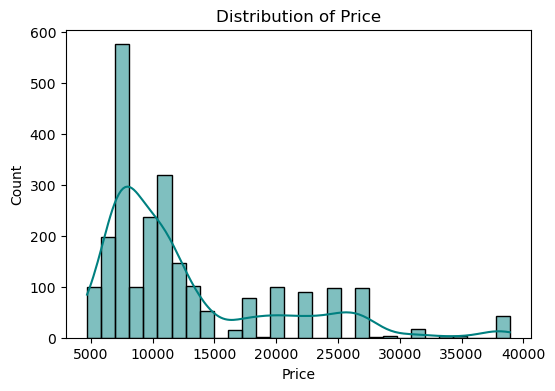

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.histplot(df['price'], bins=30, kde=True, color='teal')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()


**Observation**
- The price distribution is right-skewed, indicating that most washing machines are priced in the lower to mid-range segment. A small number of premium models are priced significantly higher, creating outliers in the dataset.

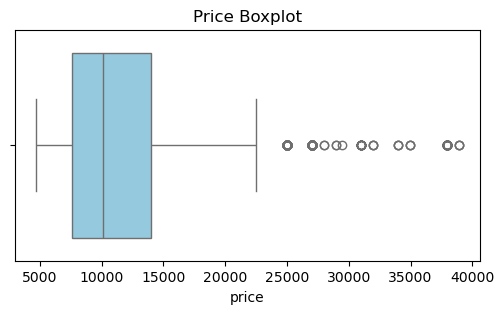

In [84]:
plt.figure(figsize=(6,3))
sns.boxplot(x=df['price'] , color='skyblue')
plt.title('Price Boxplot')
plt.show()


**Observation**
- The boxplot shows that the distribution of washing machine prices is right-skewed, with most products clustered in the lower to mid-price range. The median price lies closer to the lower quartile, indicating that affordable models dominate the market. A few high-priced outliers are visible, representing premium washing machines with advanced features and higher capacity. This suggests a wide price variation across brands, with a small segment targeting the premium category.

In [86]:
df1['rating'].value_counts().sort_index()


rating
3.9       2
4.0     131
4.1     140
4.2     541
4.3    1266
4.4     295
4.5       1
Name: count, dtype: int64

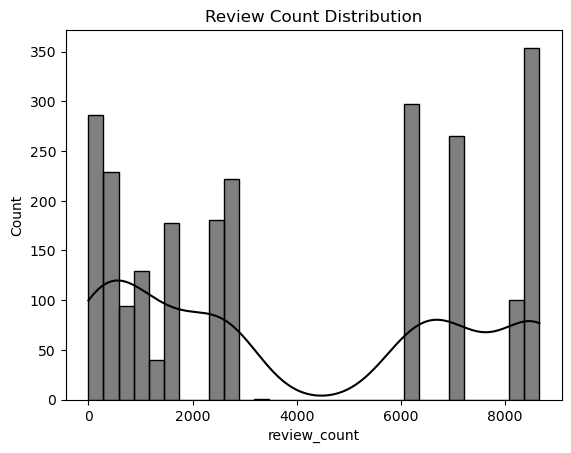

In [87]:
sns.histplot(df1['review_count'], bins=30, kde=True,color='black')
plt.title('Review Count Distribution')
plt.show()


**Observation**
- A majority of products have low to moderate review counts, while a small number of products receive exceptionally high engagement, indicating popularity bias.

In [89]:
df1['brand'].value_counts()


brand
Samsung     486
realme      433
MarQ        298
Haier       199
Thomson     199
Voltas      199
Godrej      139
BOSCH       130
LG          115
VW           99
MOTOROLA     79
Name: count, dtype: int64

In [90]:
df1['machine_type'].value_counts()


machine_type
Semi Automatic     1353
Unknown             639
Fully Automatic     384
Name: count, dtype: int64

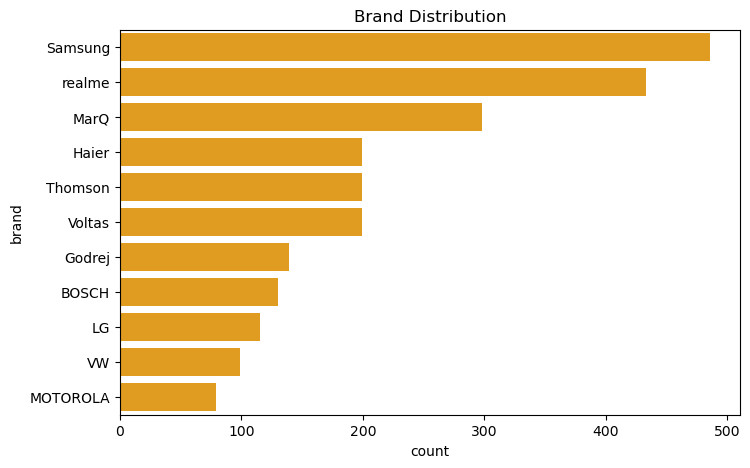

In [91]:
plt.figure(figsize=(8,5))
sns.countplot(y=df['brand'], order=df1['brand'].value_counts().index,color='orange')
plt.title('Brand Distribution')
plt.show()


**Observation**
- The dataset is dominated by a few major brands, while several brands have limited product listings. This indicates strong market presence of established brands and limited competition from smaller manufacturers.

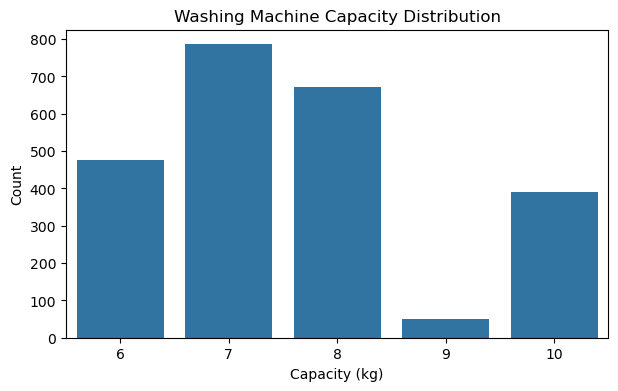

In [301]:
plt.figure(figsize=(7,4))
sns.countplot(x='capacity_kg', data=df1)
plt.title('Washing Machine Capacity Distribution')
plt.xlabel('Capacity (kg)')
plt.ylabel('Count')
plt.show()


**Observation**
- 6–8 kg capacity machines are most frequent, suggesting suitability for medium-sized households.

In [299]:
df1.head()

,brand,machine_type,capacity_kg,rpm,price,original_price,discount_percent,rating,ratings_count,review_count,warranty_years,pagenum
0,Samsung,Unknown,10,700,24990,33990,26,4.3,111681,7055,2,1
1,Samsung,Unknown,8,700,22490,30990,27,4.3,111681,7055,2,1
2,realme,Semi Automatic,7,1300,7590,12490,39,4.2,101374,8656,2,1
3,Haier,Unknown,6,800,11790,18990,37,4.3,75604,8286,2,1
4,VW,Semi Automatic,8,1300,6899,18999,63,4.3,1033,73,2,1


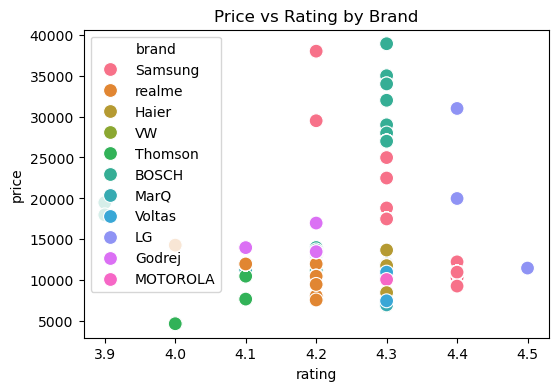

In [95]:

# 1. Scatter Plot (Price vs Rating)
plt.figure(figsize=(6,4))
sns.scatterplot(data=df1, x='rating', y='price', hue='brand', s=100)
plt.title('Price vs Rating by Brand')
plt.show()


**Observations**
- Higher-rated machines generally have higher prices.
- Some brands like LG and Whirlpool dominate higher price ranges.
- Budget brands cluster at lower prices with moderate ratings.

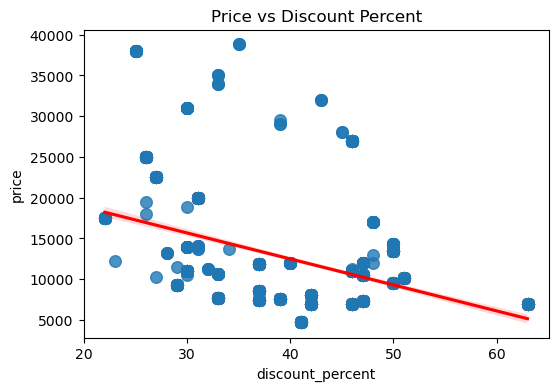

In [97]:
# 2. Regression Plot (Price vs Discount Percent)
plt.figure(figsize=(6,4))
sns.regplot(data=df1, x='discount_percent', y='price', scatter_kws={'s':70}, line_kws={'color':'red'})
plt.title('Price vs Discount Percent')
plt.show()


**Observation**
- Products with higher discounts often have lower prices.
- Linear trend shows that more discounted products are cheaper.

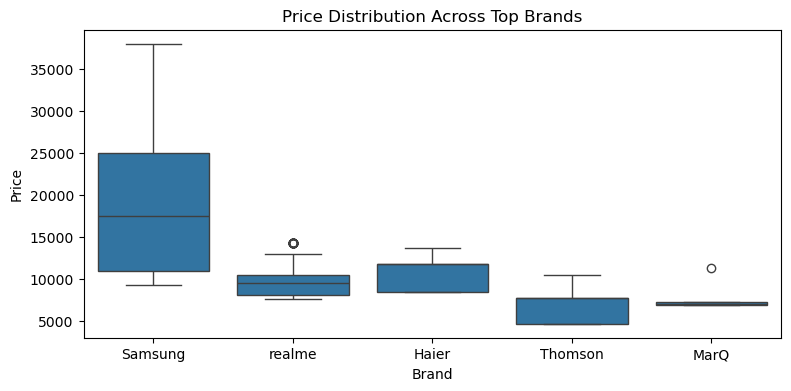

In [304]:
top_brands = df1['brand'].value_counts().head(5).index

plt.figure(figsize=(9,4))
sns.boxplot(
    x='brand',
    y='price',
    data=df1[df1['brand'].isin(top_brands)]
)
plt.title('Price Distribution Across Top Brands')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.show()


**Observation**
- Price ranges vary significantly across brands, showing brand-based pricing strategies.


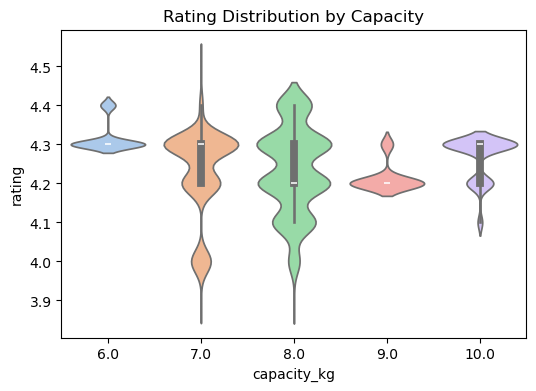

In [101]:

# 4. Violin Plot (Rating by Capacity)
plt.figure(figsize=(6,4))
sns.violinplot(data=df1, x='capacity_kg', y='rating', palette='pastel')
plt.title('Rating Distribution by Capacity')
plt.show()



**Observation**
- Machines with higher capacities (8-10 kg) tend to have slightly better ratings.
- Most machines cluster in 6–7 kg range with mixed ratings.

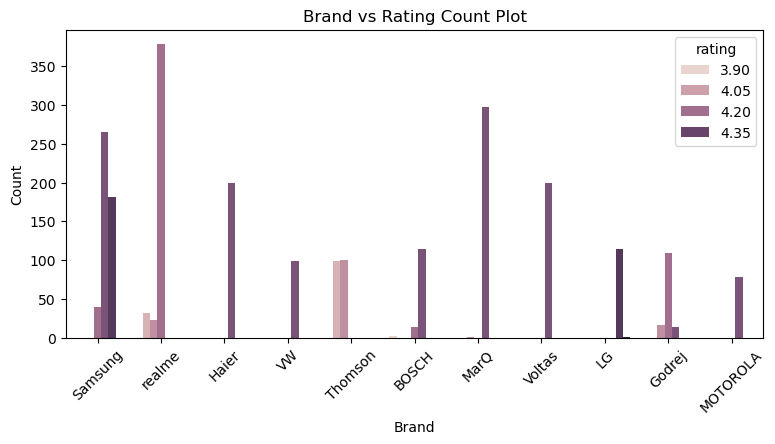

In [307]:


plt.figure(figsize=(9,4))
sns.countplot(
    x='brand',
    hue='rating',
    data=df1
)
plt.title('Brand vs Rating Count Plot')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


**Observation**
- Most brands receive ratings around 4 stars, indicating generally positive customer feedback.

- Some brands have fewer low-rated products compared to others.

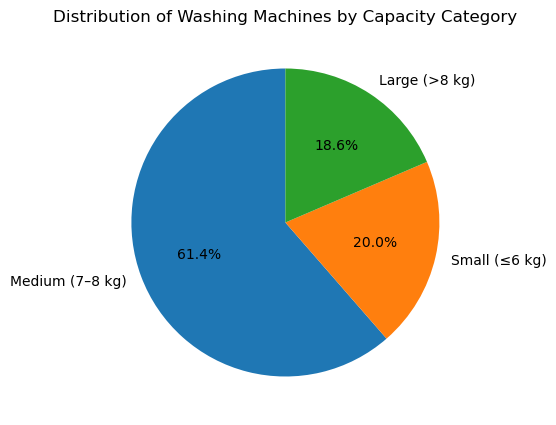

In [312]:

df1['capacity_category'] = pd.cut(
    df1['capacity_kg'],
    bins=[0,6,8,15],
    labels=['Small (≤6 kg)', 'Medium (7–8 kg)', 'Large (>8 kg)']
)

capacity_counts = df1['capacity_category'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(
    capacity_counts,
    labels=capacity_counts.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Distribution of Washing Machines by Capacity Category')
plt.show()

**Observation**
- Medium-capacity washing machines (7–8 kg) form the largest share, suitable for average households.

## Multivariate

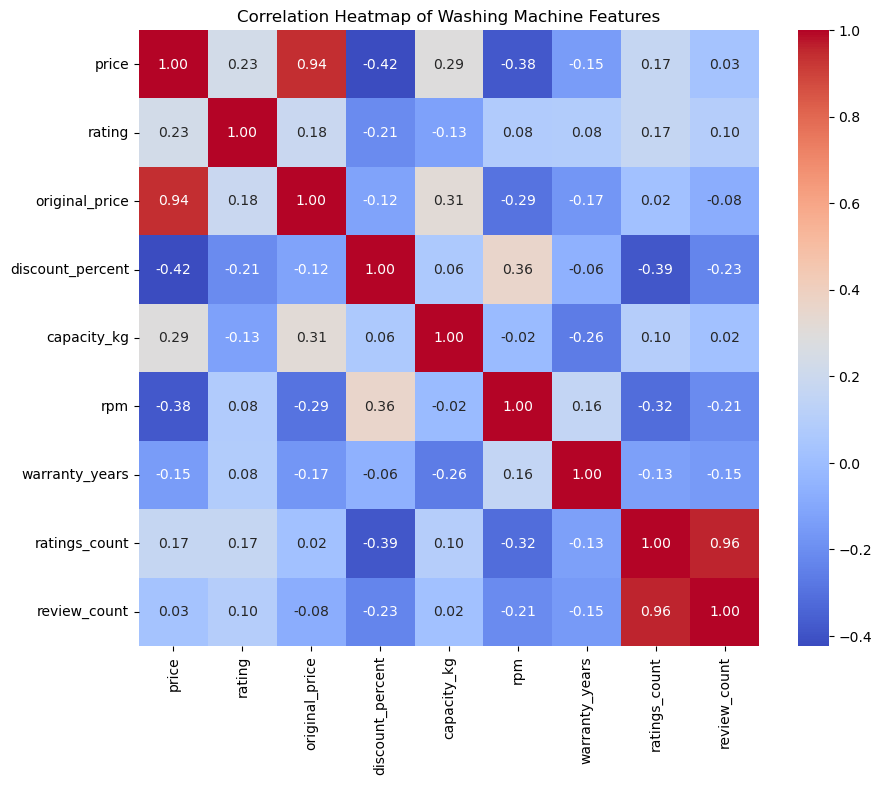

In [108]:
num_cols = ['price', 'rating', 'original_price', 'discount_percent', 
            'capacity_kg', 'rpm', 'warranty_years', 'ratings_count', 'review_count']

# Heatmap for correlation
plt.figure(figsize=(10,8))
corr = df1[num_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Washing Machine Features")
plt.show()


**Observations**
- Price vs Original Price → Strong positive correlation (expected, higher original price → higher selling price).
- Price vs Discount Percent → Likely negative correlation (higher discount for pricier items).
- Rating vs Review Count / Ratings Count → Moderate correlation (popular products with many reviews tend to have more stable ratings).
- Capacity vs RPM → Might be weak correlation, but you could see clusters based on machine type.
- Discount Percent vs Price / Original Price → High discounts for mid-range products in the dataset.

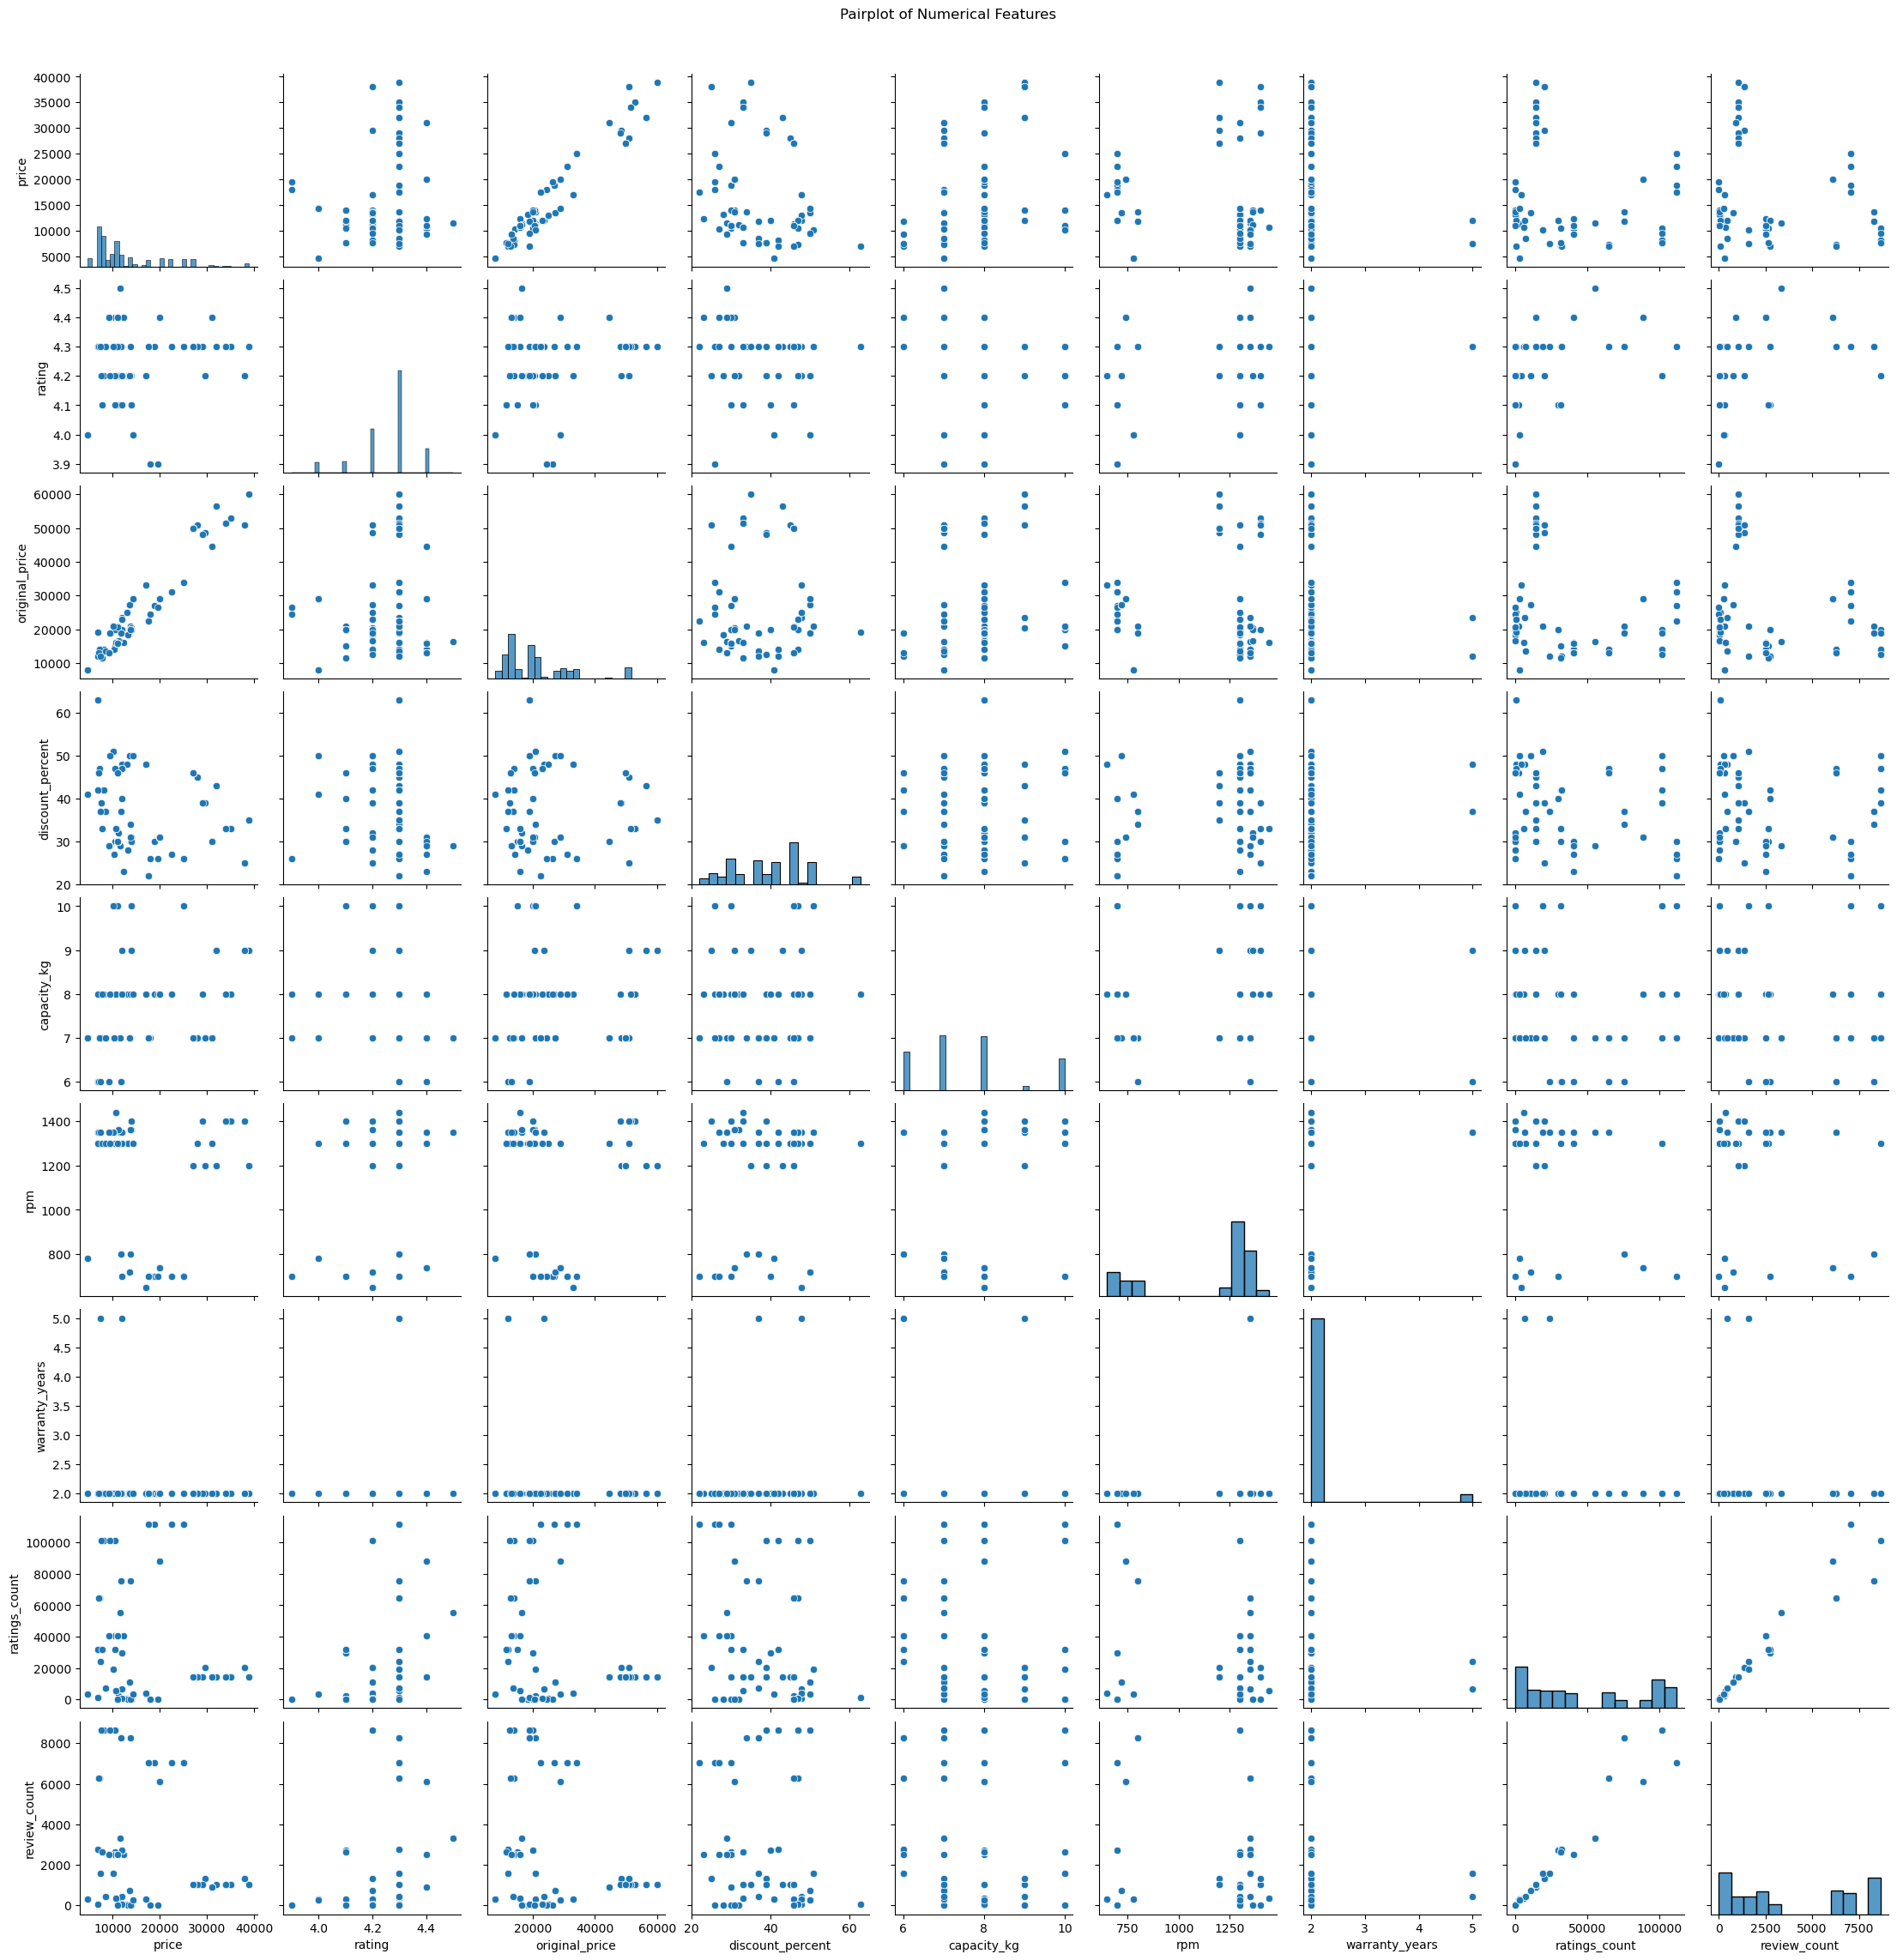

In [110]:

sns.pairplot(df1[num_cols])
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

**Observations**
- price and original_price are strongly positively correlated.
- discount_percent has a mild negative correlation with price (higher price → bigger discounts sometimes).
- ratings_count and review_count are strongly correlated (more ratings → more reviews).
- rating is mostly clustered around 4–4.5 stars.

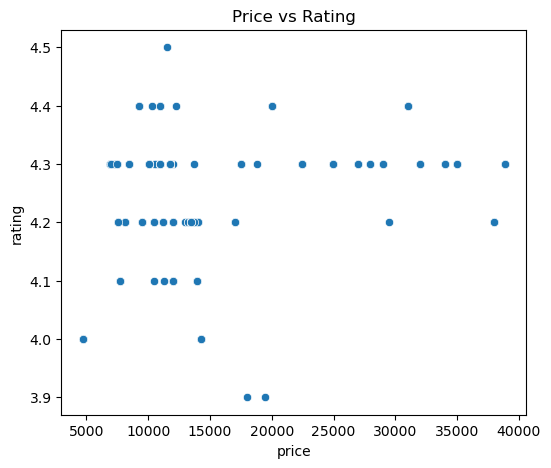

In [112]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=df1, x='price', y='rating')
plt.title("Price vs Rating")
plt.show()

**Observations**
- Price vs Rating: Most products with higher prices maintain ratings ~4–4.5. No extreme correlation but high-price items don’t have low ratings.